In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [2]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path) 
hojas = xlsx.sheet_names



In [3]:
df1 = xlsx.parse('Hoja1')
df1 = df1.drop(0)

df1 = df1.reset_index()
df1 = df1.drop("index", axis=1)
df1 = df1.drop("Nanoparticles", axis=1)
df1

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
0,16.4,40,448.7,0.813,-0.872,1.14,19.62,0.27559,354.76,13.22,5.35
1,25.4,60,90.4,0.27,-4.56,1.32,24.49,0.48623,326.1,2.77,1.683
2,19,40,43.8,0.433,-5.13,1.26,24.43,0.64501,235.23,8.4,1.56
3,16.4,40,483.2,0.555,-0.464,1.19,20.92,0.26073,195.67,6.13,1.77
4,30.6,80,121.1,0.28,1.46,1.31,21.67,0.28078,236,9.072,0.85


In [4]:
from scipy.stats import pearsonr
rho = df1.corr()
pval = df1.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)  
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t])) 
Res_pearson_sig = rho.round(3).astype(str) + p
Res_pearson_sig.to_csv('hoja1_2do_pearson_sig_cat.csv')
Res_pearson_sig.to_excel('hoja1_2do_pearson_sig_cat.xlsx')
Res_pearson_sig

/tmp/ipykernel_110797/2274574987.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))


,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
Average diameter of metallic cores (nm),1.0***,0.98**,-0.66,-0.818,0.223,0.856,0.336,-0.003,-0.034,-0.298,-0.599
Size distribution (nm),0.98**,1.0***,-0.504,-0.722,0.406,0.749,0.149,-0.199,-0.044,-0.206,-0.527
Hydrodynamic diameter,-0.66,-0.504,1.0***,0.802,0.502,-0.874,-0.857,-0.744,0.037,0.373,0.613
Polydispersity index,-0.818,-0.722,0.802,1.0***,0.192,-0.982**,-0.735,-0.38,0.318,0.709,0.894*
Zeta potential,0.223,0.406,0.502,0.192,1.0***,-0.247,-0.799,-0.909*,-0.224,0.434,0.076
Metallic silver (%w/w),0.856,0.749,-0.874,-0.982**,-0.247,1.0***,0.761,0.436,-0.159,-0.637,-0.804
PVP (% w/w),0.336,0.149,-0.857,-0.735,-0.799,0.761,1.0***,0.886*,-0.093,-0.68,-0.616
Glucosidase (μg/ml),-0.003,-0.199,-0.744,-0.38,-0.909*,0.436,0.886*,1.0***,0.003,-0.333,-0.306
Amilase (μg/ml),-0.034,-0.044,0.037,0.318,-0.224,-0.159,-0.093,0.003,1.0***,0.228,0.706
DPPIV (μg/ml),-0.298,-0.206,0.373,0.709,0.434,-0.637,-0.68,-0.333,0.228,1.0***,0.668


In [5]:
df1.corr()

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
Average diameter of metallic cores (nm),1.000000,0.980223,-0.660199,-0.817924,0.222514,0.856467,0.336080,-0.003115,-0.033628,-0.297974,-0.599195
Size distribution (nm),0.980223,1.000000,-0.503579,-0.721536,0.405659,0.748686,0.148567,-0.198936,-0.043717,-0.206124,-0.526804
Hydrodynamic diameter,-0.660199,-0.503579,1.000000,0.801793,0.502136,-0.873655,-0.857344,-0.743592,0.036531,0.372551,0.612785
Polydispersity index,-0.817924,-0.721536,0.801793,1.000000,0.191947,-0.981869,-0.735227,-0.379590,0.317556,0.709473,0.894061
Zeta potential,0.222514,0.405659,0.502136,0.191947,1.000000,-0.246795,-0.798897,-0.909376,-0.223968,0.434104,0.076300
Metallic silver (%w/w),0.856467,0.748686,-0.873655,-0.981869,-0.246795,1.000000,0.760814,0.436001,-0.159225,-0.636939,-0.803676
PVP (% w/w),0.336080,0.148567,-0.857344,-0.735227,-0.798897,0.760814,1.000000,0.885643,-0.093194,-0.680115,-0.616034
Glucosidase (μg/ml),-0.003115,-0.198936,-0.743592,-0.379590,-0.909376,0.436001,0.885643,1.000000,0.003388,-0.332997,-0.306252
Amilase (μg/ml),-0.033628,-0.043717,0.036531,0.317556,-0.223968,-0.159225,-0.093194,0.003388,1.000000,0.228345,0.705911
DPPIV (μg/ml),-0.297974,-0.206124,0.372551,0.709473,0.434104,-0.636939,-0.680115,-0.332997,0.228345,1.000000,0.667851


In [6]:
for col in df1.columns:
    df1[col] = np.divide(df1[col], df1.max())
    
    
df1

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.describe()

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
count,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path) 
hojas = xlsx.sheet_names

df1 = xlsx.parse('Hoja1')
df1 = df1.drop(0)

df1 = df1.reset_index()
df1 = df1.drop("index", axis=1)
df1 = df1.drop("Nanoparticles", axis=1)
df1

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
0,16.4,40,448.7,0.813,-0.872,1.14,19.62,0.27559,354.76,13.22,5.35
1,25.4,60,90.4,0.27,-4.56,1.32,24.49,0.48623,326.1,2.77,1.683
2,19,40,43.8,0.433,-5.13,1.26,24.43,0.64501,235.23,8.4,1.56
3,16.4,40,483.2,0.555,-0.464,1.19,20.92,0.26073,195.67,6.13,1.77
4,30.6,80,121.1,0.28,1.46,1.31,21.67,0.28078,236,9.072,0.85


In [9]:
df1.describe()

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
count,5.0,5,5.0,5.000,5.000,5.00,5.00,5.00000,5.00,5.00,5.00
unique,4.0,3,5.0,5.000,5.000,5.00,5.00,5.00000,5.00,5.00,5.00
top,16.4,40,448.7,0.813,-0.872,1.14,19.62,0.27559,354.76,13.22,5.35
freq,2.0,3,1.0,1.000,1.000,1.00,1.00,1.00000,1.00,1.00,1.00


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Average diameter of  metallic cores (nm)  5 non-null      object
 1   Size distribution (nm)                    5 non-null      object
 2   Hydrodynamic diameter                     5 non-null      object
 3   Polydispersity index                      5 non-null      object
 4   Zeta potential                            5 non-null      object
 5   Metallic silver (%w/w)                    5 non-null      object
 6   PVP (% w/w)                               5 non-null      object
 7   Glucosidase (μg/ml)                       5 non-null      object
 8   Amilase (μg/ml)                           5 non-null      object
 9   DPPIV (μg/ml)                             5 non-null      object
 10  AGEs (μg/ml)                              5 non-null  

In [11]:
df1.apply(pd.to_numeric)

,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
0,16.4,40,448.7,0.813,-0.872,1.14,19.62,0.27559,354.76,13.220,5.350
1,25.4,60,90.4,0.270,-4.560,1.32,24.49,0.48623,326.10,2.770,1.683
2,19.0,40,43.8,0.433,-5.130,1.26,24.43,0.64501,235.23,8.400,1.560
3,16.4,40,483.2,0.555,-0.464,1.19,20.92,0.26073,195.67,6.130,1.770
4,30.6,80,121.1,0.280,1.460,1.31,21.67,0.28078,236.00,9.072,0.850


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Average diameter of  metallic cores (nm)  5 non-null      object
 1   Size distribution (nm)                    5 non-null      object
 2   Hydrodynamic diameter                     5 non-null      object
 3   Polydispersity index                      5 non-null      object
 4   Zeta potential                            5 non-null      object
 5   Metallic silver (%w/w)                    5 non-null      object
 6   PVP (% w/w)                               5 non-null      object
 7   Glucosidase (μg/ml)                       5 non-null      object
 8   Amilase (μg/ml)                           5 non-null      object
 9   DPPIV (μg/ml)                             5 non-null      object
 10  AGEs (μg/ml)                              5 non-null  

In [13]:
df1 = df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Average diameter of  metallic cores (nm)  5 non-null      float64
 1   Size distribution (nm)                    5 non-null      int64  
 2   Hydrodynamic diameter                     5 non-null      float64
 3   Polydispersity index                      5 non-null      float64
 4   Zeta potential                            5 non-null      float64
 5   Metallic silver (%w/w)                    5 non-null      float64
 6   PVP (% w/w)                               5 non-null      float64
 7   Glucosidase (μg/ml)                       5 non-null      float64
 8   Amilase (μg/ml)                           5 non-null      float64
 9   DPPIV (μg/ml)                             5 non-null      float64
 10  AGEs (μg/ml)                              

In [14]:
df1.columns

Index(['Average diameter of  metallic cores (nm)', 'Size distribution (nm)',
       'Hydrodynamic diameter ', 'Polydispersity index', 'Zeta potential',
       'Metallic silver (%w/w)', 'PVP (% w/w) ', 'Glucosidase (μg/ml)',
       'Amilase (μg/ml)', 'DPPIV (μg/ml)', 'AGEs (μg/ml)'],
      dtype='object')

In [15]:
import pandas as pd

path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path) 
hojas = xlsx.sheet_names

df1 = xlsx.parse('Hoja1')
df1 = df1.drop(0)

df1 = df1.reset_index()
df1 = df1.drop("index", axis=1)
tmp_df= df1.drop("Nanoparticles", axis=1)


cols = ['Average diameter of  metallic cores (nm)',
       'Size distribution (nm)', 'Hydrodynamic diameter ',
       'Polydispersity index', 'Zeta potential', 'Metallic silver (%w/w)',
       'PVP (% w/w) ', 'Glucosidase (μg/ml)', 'Amilase (μg/ml)',
       'DPPIV (μg/ml)', 'AGEs (μg/ml)']




for col in cols:
    
    df1[col] = df1[col].apply(pd.to_numeric)
    df1[col] = np.divide(df1[col], df1[col].max())
    
    
    
df1

,Nanoparticles,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml)
0,AgNP1,0.535948,0.50,0.928601,1.000000,-0.597260,0.863636,0.801143,0.427265,1.000000,1.000000,1.000000
1,AgNP2,0.830065,0.75,0.187086,0.332103,-3.123288,1.000000,1.000000,0.753833,0.919213,0.209531,0.314579
2,AgNP3,0.620915,0.50,0.090646,0.532595,-3.513699,0.954545,0.997550,1.000000,0.663068,0.635401,0.291589
3,AgNP4,0.535948,0.50,1.000000,0.682657,-0.317808,0.901515,0.854226,0.404226,0.551556,0.463691,0.330841
4,AgNP5,1.000000,1.00,0.250621,0.344403,1.000000,0.992424,0.884851,0.435311,0.665238,0.686233,0.158879


In [16]:
###########################

In [17]:
import pandas as pd
import numpy as np
import itertools

path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path) 
hojas = xlsx.sheet_names

df1 = xlsx.parse('Hoja2')
df= df1.copy()

In [18]:
df

,Nanoparticles,Average diameter of metallic cores (nm),Size distribution (nm),Hydrodynamic diameter,Polydispersity index,Zeta potential,Metallic silver (%w/w),PVP (% w/w),Glucosidase (μg/ml),Amilase (μg/ml),DPPIV (μg/ml),AGEs (μg/ml),Glucosidase (μg/ml).1,Amilase (μg/ml).1,DPPIV (μg/ml).1,AGEs (μg/ml).1
0,NaN,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs,Glucosidase,Amilase,DPPIV,AGEs
1,AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,15.88785,activo,activo,inactivo,inactivo
2,AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100,53.622771,60.003067,100,50.505051,activo,activo,activo,activo
3,AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002,40.422629,83.182417,32.97619,54.487179,inactivo,activo,inactivo,activo
4,AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621,100,100,45.187602,48.022599,activo,activo,inactivo,inactivo
5,AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096,92.859178,82.911017,30.53351,100,activo,activo,inactivo,activo}


In [19]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

In [20]:
df

,NaN,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs,Glucosidase,Amilase,DPPIV,AGEs
1,AgNP1,53.594771,50,92.860099,100,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,15.88785,activo,activo,inactivo,inactivo
2,AgNP2,83.006536,75,18.708609,33.210332,88.888889,100,100,53.622771,60.003067,100,50.505051,activo,activo,activo,activo
3,AgNP3,62.091503,50,9.06457,53.259533,100,95.454545,99.755002,40.422629,83.182417,32.97619,54.487179,inactivo,activo,inactivo,activo
4,AgNP4,53.594771,50,100,68.265683,9.044834,90.151515,85.422621,100,100,45.187602,48.022599,activo,activo,inactivo,inactivo
5,AgNP5,100,100,25.062086,34.440344,28,99.242424,88.485096,92.859178,82.911017,30.53351,100,activo,activo,inactivo,activo}


In [21]:
import pandas as pd
import numpy as np
import itertools

path = "../data/datos nanoparticulas ML.xlsx"
xlsx = pd.ExcelFile(path) 
hojas = xlsx.sheet_names

df1 = xlsx.parse('Hoja3')

df = df1.copy()


cols = ['ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase', 'Amilase',
       'DPPIV', 'AGEs']

for col in cols:
    df1[col] = df1[col].astype(float)
    
    
df1 = df1[["Nanoparticles", 'ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase', 'Amilase',
       'DPPIV', 'AGEs']]
    
df1


,Nanoparticles,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
0,AgNP1,53.594771,50.0,92.860099,100.000000,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,15.887850
1,AgNP2,83.006536,75.0,18.708609,33.210332,88.888889,100.000000,100.000000,53.622771,60.003067,100.000000,50.505051
2,AgNP3,62.091503,50.0,9.064570,53.259533,100.000000,95.454545,99.755002,40.422629,83.182417,32.976190,54.487179
3,AgNP4,53.594771,50.0,100.000000,68.265683,9.044834,90.151515,85.422621,100.000000,100.000000,45.187602,48.022599
4,AgNP5,100.000000,100.0,25.062086,34.440344,28.000000,99.242424,88.485096,92.859178,82.911017,30.533510,100.000000


In [22]:
df1.index

RangeIndex(start=0, stop=5, step=1)

In [23]:
df1.columns

Index(['Nanoparticles', 'ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP',
       'Glucosidase', 'Amilase', 'DPPIV', 'AGEs'],
      dtype='object')

In [24]:
df1

,Nanoparticles,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
0,AgNP1,53.594771,50.0,92.860099,100.000000,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,15.887850
1,AgNP2,83.006536,75.0,18.708609,33.210332,88.888889,100.000000,100.000000,53.622771,60.003067,100.000000,50.505051
2,AgNP3,62.091503,50.0,9.064570,53.259533,100.000000,95.454545,99.755002,40.422629,83.182417,32.976190,54.487179
3,AgNP4,53.594771,50.0,100.000000,68.265683,9.044834,90.151515,85.422621,100.000000,100.000000,45.187602,48.022599
4,AgNP5,100.000000,100.0,25.062086,34.440344,28.000000,99.242424,88.485096,92.859178,82.911017,30.533510,100.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nanoparticles  5 non-null      object 
 1   ADMC           5 non-null      float64
 2   SD             5 non-null      float64
 3   HD             5 non-null      float64
 4   PDI            5 non-null      float64
 5   ZP             5 non-null      float64
 6   MS             5 non-null      float64
 7   PVP            5 non-null      float64
 8   Glucosidase    5 non-null      float64
 9   Amilase        5 non-null      float64
 10  DPPIV          5 non-null      float64
 11  AGEs           5 non-null      float64
dtypes: float64(11), object(1)
memory usage: 608.0+ bytes


In [26]:
df1 = df1.set_index("Nanoparticles")

In [27]:
from scipy.stats import pearsonr
rho = df1.corr()
pval = df1.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)  
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t])) 
Res_pearson_sig = rho.round(3).astype(str) + p
Res_pearson_sig.to_csv('hoja1_2do_pearson_sig_cat.csv')
Res_pearson_sig.to_excel('hoja1_2do_pearson_sig_cat.xlsx')
Res_pearson_sig

/tmp/ipykernel_110797/2274574987.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))


,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
ADMC,1.0***,0.98**,-0.66,-0.818,0.192,0.856,0.336,-0.091,-0.073,0.298,0.836
SD,0.98**,1.0***,-0.504,-0.722,-0.006,0.749,0.149,0.107,-0.044,0.207,0.829
HD,-0.66,-0.504,1.0***,0.802,-0.832,-0.874,-0.857,0.785,0.106,-0.344,-0.57
PDI,-0.818,-0.722,0.802,1.0***,-0.529,-0.982**,-0.735,0.449,-0.21,-0.567,-0.8
ZP,0.192,-0.006,-0.832,-0.529,1.0***,0.601,0.948*,-0.994***,-0.225,0.495,0.074
MS,0.856,0.749,-0.874,-0.982**,0.601,1.0***,0.761,-0.518,0.04,0.566,0.756
PVP,0.336,0.149,-0.857,-0.735,0.948*,0.761,1.0***,-0.924*,-0.008,0.618,0.287
Glucosidase,-0.091,0.107,0.785,0.449,-0.994***,-0.518,-0.924*,1.0***,0.202,-0.435,-0.005
Amilase,-0.073,-0.044,0.106,-0.21,-0.225,0.04,-0.008,0.202,1.0***,-0.242,0.463
DPPIV,0.298,0.207,-0.344,-0.567,0.495,0.566,0.618,-0.435,-0.242,1.0***,0.014


In [28]:
Res_pearson_sig.index

Index(['ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase', 'Amilase',
       'DPPIV', 'AGEs'],
      dtype='object')

In [29]:
pval.to_csv('hoja1_2do_pearson_pval.csv')
pval.to_excel('hoja1_2do_pearson_pval.xlsx')
pval

,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
ADMC,0.000000,0.003329,0.225264,0.090674,0.757441,0.063853,0.580288,0.883777,0.907406,0.626105,0.077552
SD,0.003329,0.000000,0.387060,0.168833,0.992727,0.145401,0.811537,0.864051,0.943655,0.738379,0.082789
HD,0.225264,0.387060,0.000000,0.102721,0.080338,0.052877,0.063278,0.115500,0.865212,0.571105,0.315583
PDI,0.090674,0.168833,0.102721,0.000000,0.359852,0.002923,0.156890,0.448192,0.734691,0.318722,0.104133
ZP,0.757441,0.992727,0.080338,0.359852,0.000000,0.283872,0.014114,0.000571,0.715873,0.396928,0.906242
MS,0.063853,0.145401,0.052877,0.002923,0.283872,0.000000,0.135272,0.370979,0.949629,0.320250,0.138925
PVP,0.580288,0.811537,0.063278,0.156890,0.014114,0.135272,0.000000,0.025035,0.990040,0.266349,0.640136
Glucosidase,0.883777,0.864051,0.115500,0.448192,0.000571,0.370979,0.025035,0.000000,0.744725,0.464094,0.993819
Amilase,0.907406,0.943655,0.865212,0.734691,0.715873,0.949629,0.990040,0.744725,0.000000,0.695244,0.432444
DPPIV,0.626105,0.738379,0.571105,0.318722,0.396928,0.320250,0.266349,0.464094,0.695244,0.000000,0.982207


In [30]:
Res_pearson = df1.corr(method='pearson').round(3)
Res_pearson.to_csv('second_pearson_cat.csv')
Res_pearson

,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
ADMC,1.000,0.980,-0.660,-0.818,0.192,0.856,0.336,-0.091,-0.073,0.298,0.836
SD,0.980,1.000,-0.504,-0.722,-0.006,0.749,0.149,0.107,-0.044,0.207,0.829
HD,-0.660,-0.504,1.000,0.802,-0.832,-0.874,-0.857,0.785,0.106,-0.344,-0.570
PDI,-0.818,-0.722,0.802,1.000,-0.529,-0.982,-0.735,0.449,-0.210,-0.567,-0.800
ZP,0.192,-0.006,-0.832,-0.529,1.000,0.601,0.948,-0.994,-0.225,0.495,0.074
MS,0.856,0.749,-0.874,-0.982,0.601,1.000,0.761,-0.518,0.040,0.566,0.756
PVP,0.336,0.149,-0.857,-0.735,0.948,0.761,1.000,-0.924,-0.008,0.618,0.287
Glucosidase,-0.091,0.107,0.785,0.449,-0.994,-0.518,-0.924,1.000,0.202,-0.435,-0.005
Amilase,-0.073,-0.044,0.106,-0.210,-0.225,0.040,-0.008,0.202,1.000,-0.242,0.463
DPPIV,0.298,0.207,-0.344,-0.567,0.495,0.566,0.618,-0.435,-0.242,1.000,0.014


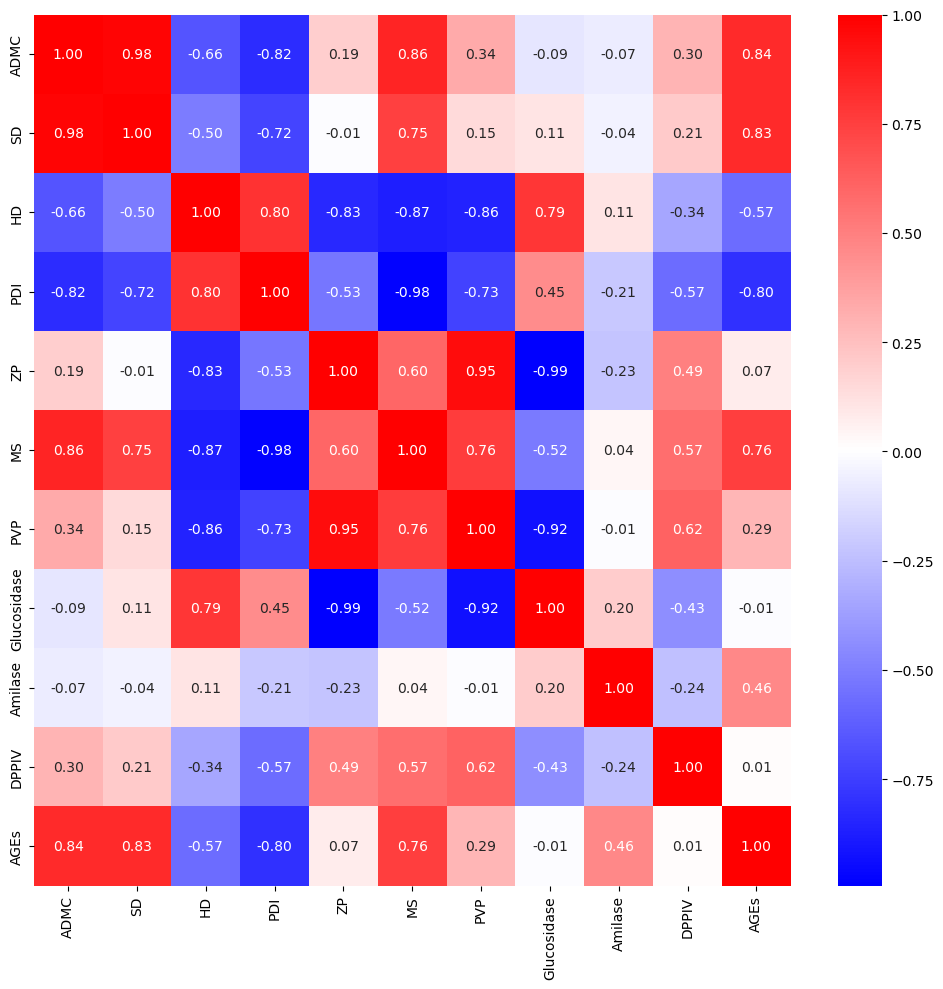

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=True, cmap='bwr', fmt='.2f') #seaborn
plt.tight_layout()
# plt.savefig('corr_pearson_number_cat.pdf', dpi=600)
plt.savefig('corr_pearson_number_cat.pdf')


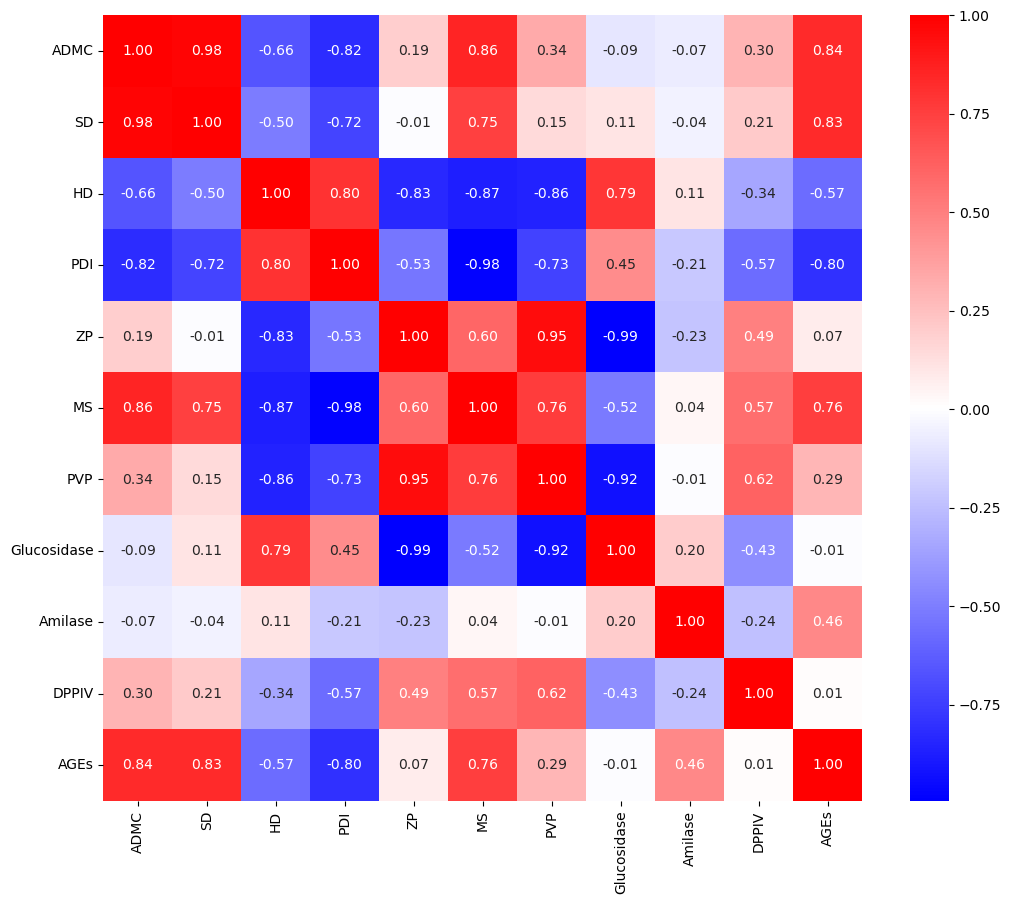

In [36]:
sns.heatmap(Res_pearson, annot=True, cmap='bwr', fmt='.2f') #seaborn

ax = plt.gca()
fig = plt.gcf()

k=1.7
fw = 6*k
fh = 5*k
ff = fw/fh

fh = 6*k
fw = fh*ff

fig.set_size_inches(fw, fh)

# plt.tight_layout()
PATH_SAVE = 'corr_pearson_number_cat2.pdf'
fig.savefig(PATH_SAVE, format="pdf", bbox_inches='tight')        


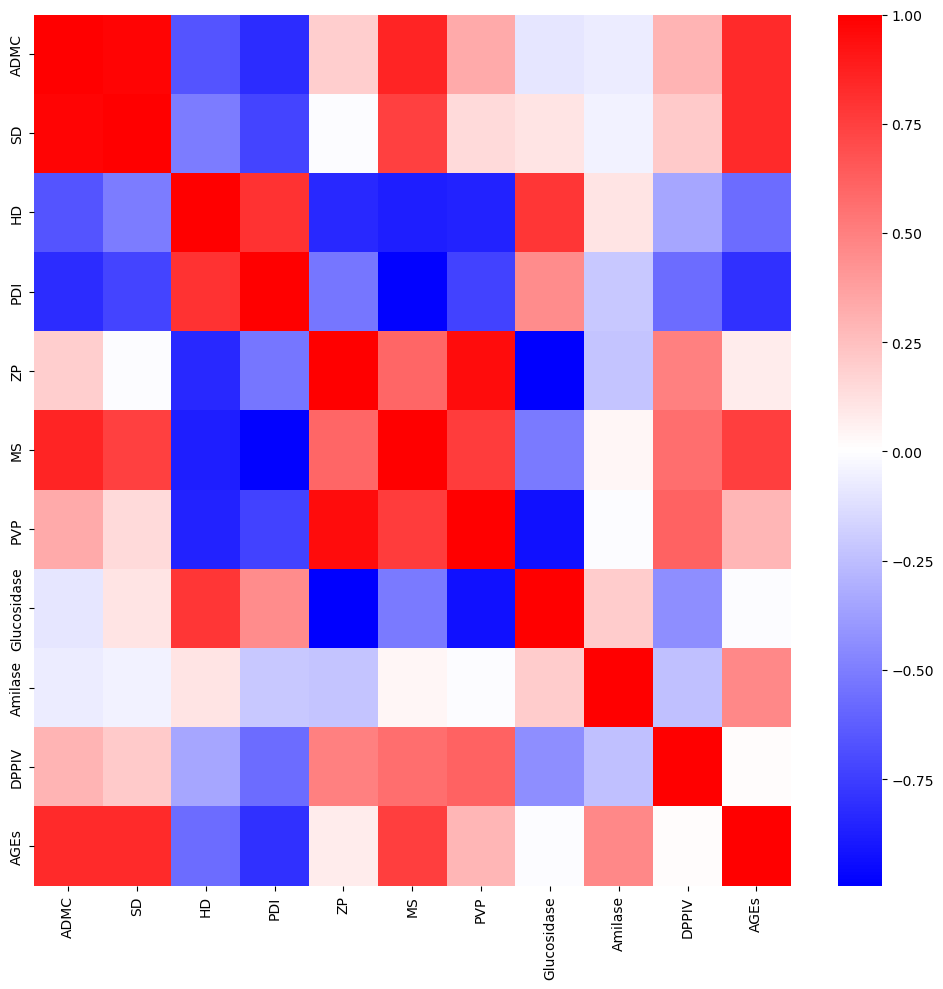

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(Res_pearson, annot=False, cmap='bwr', fmt='.2f')
plt.tight_layout()
plt.savefig('corr_pearson_no_number_cat.pdf', dpi=300)



In [33]:
Res_pearson

,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
ADMC,1.000,0.980,-0.660,-0.818,0.192,0.856,0.336,-0.091,-0.073,0.298,0.836
SD,0.980,1.000,-0.504,-0.722,-0.006,0.749,0.149,0.107,-0.044,0.207,0.829
HD,-0.660,-0.504,1.000,0.802,-0.832,-0.874,-0.857,0.785,0.106,-0.344,-0.570
PDI,-0.818,-0.722,0.802,1.000,-0.529,-0.982,-0.735,0.449,-0.210,-0.567,-0.800
ZP,0.192,-0.006,-0.832,-0.529,1.000,0.601,0.948,-0.994,-0.225,0.495,0.074
MS,0.856,0.749,-0.874,-0.982,0.601,1.000,0.761,-0.518,0.040,0.566,0.756
PVP,0.336,0.149,-0.857,-0.735,0.948,0.761,1.000,-0.924,-0.008,0.618,0.287
Glucosidase,-0.091,0.107,0.785,0.449,-0.994,-0.518,-0.924,1.000,0.202,-0.435,-0.005
Amilase,-0.073,-0.044,0.106,-0.210,-0.225,0.040,-0.008,0.202,1.000,-0.242,0.463
DPPIV,0.298,0.207,-0.344,-0.567,0.495,0.566,0.618,-0.435,-0.242,1.000,0.014


In [34]:
type(Res_pearson.stack())

pandas.core.series.Series

In [35]:
edges = Res_pearson.stack().reset_index()


In [36]:
#convert matrix to list of edges and rename the columns
edges = Res_pearson.stack().reset_index()
edges.columns = ['Features_1','Features_2','correlation']
edges

,Features_1,Features_2,correlation
0,ADMC,ADMC,1.000
1,ADMC,SD,0.980
2,ADMC,HD,-0.660
3,ADMC,PDI,-0.818
4,ADMC,ZP,0.192
...,...,...,...
116,AGEs,PVP,0.287
117,AGEs,Glucosidase,-0.005
118,AGEs,Amilase,0.463
119,AGEs,DPPIV,0.014


In [37]:
Res_pearson.stack().reset_index()

,level_0,level_1,0
0,ADMC,ADMC,1.000
1,ADMC,SD,0.980
2,ADMC,HD,-0.660
3,ADMC,PDI,-0.818
4,ADMC,ZP,0.192
...,...,...,...
116,AGEs,PVP,0.287
117,AGEs,Glucosidase,-0.005
118,AGEs,Amilase,0.463
119,AGEs,DPPIV,0.014


In [38]:
#remove self correlations
edges = edges.loc[edges['Features_1'] != edges['Features_2']].copy()

In [39]:
edges

,Features_1,Features_2,correlation
1,ADMC,SD,0.980
2,ADMC,HD,-0.660
3,ADMC,PDI,-0.818
4,ADMC,ZP,0.192
5,ADMC,MS,0.856
...,...,...,...
115,AGEs,MS,0.756
116,AGEs,PVP,0.287
117,AGEs,Glucosidase,-0.005
118,AGEs,Amilase,0.463


In [40]:
edges["Features_1"].unique()

array(['ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase',
       'Amilase', 'DPPIV', 'AGEs'], dtype=object)

In [41]:
edges["Features_2"].unique()

array(['SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase', 'Amilase',
       'DPPIV', 'AGEs', 'ADMC'], dtype=object)

In [42]:
edges.isnull().sum()

Features_1     0
Features_2     0
correlation    0
dtype: int64

In [43]:
G0 = nx.from_pandas_edgelist(edges, 'Features_1', 'Features_2', edge_attr=['correlation'])


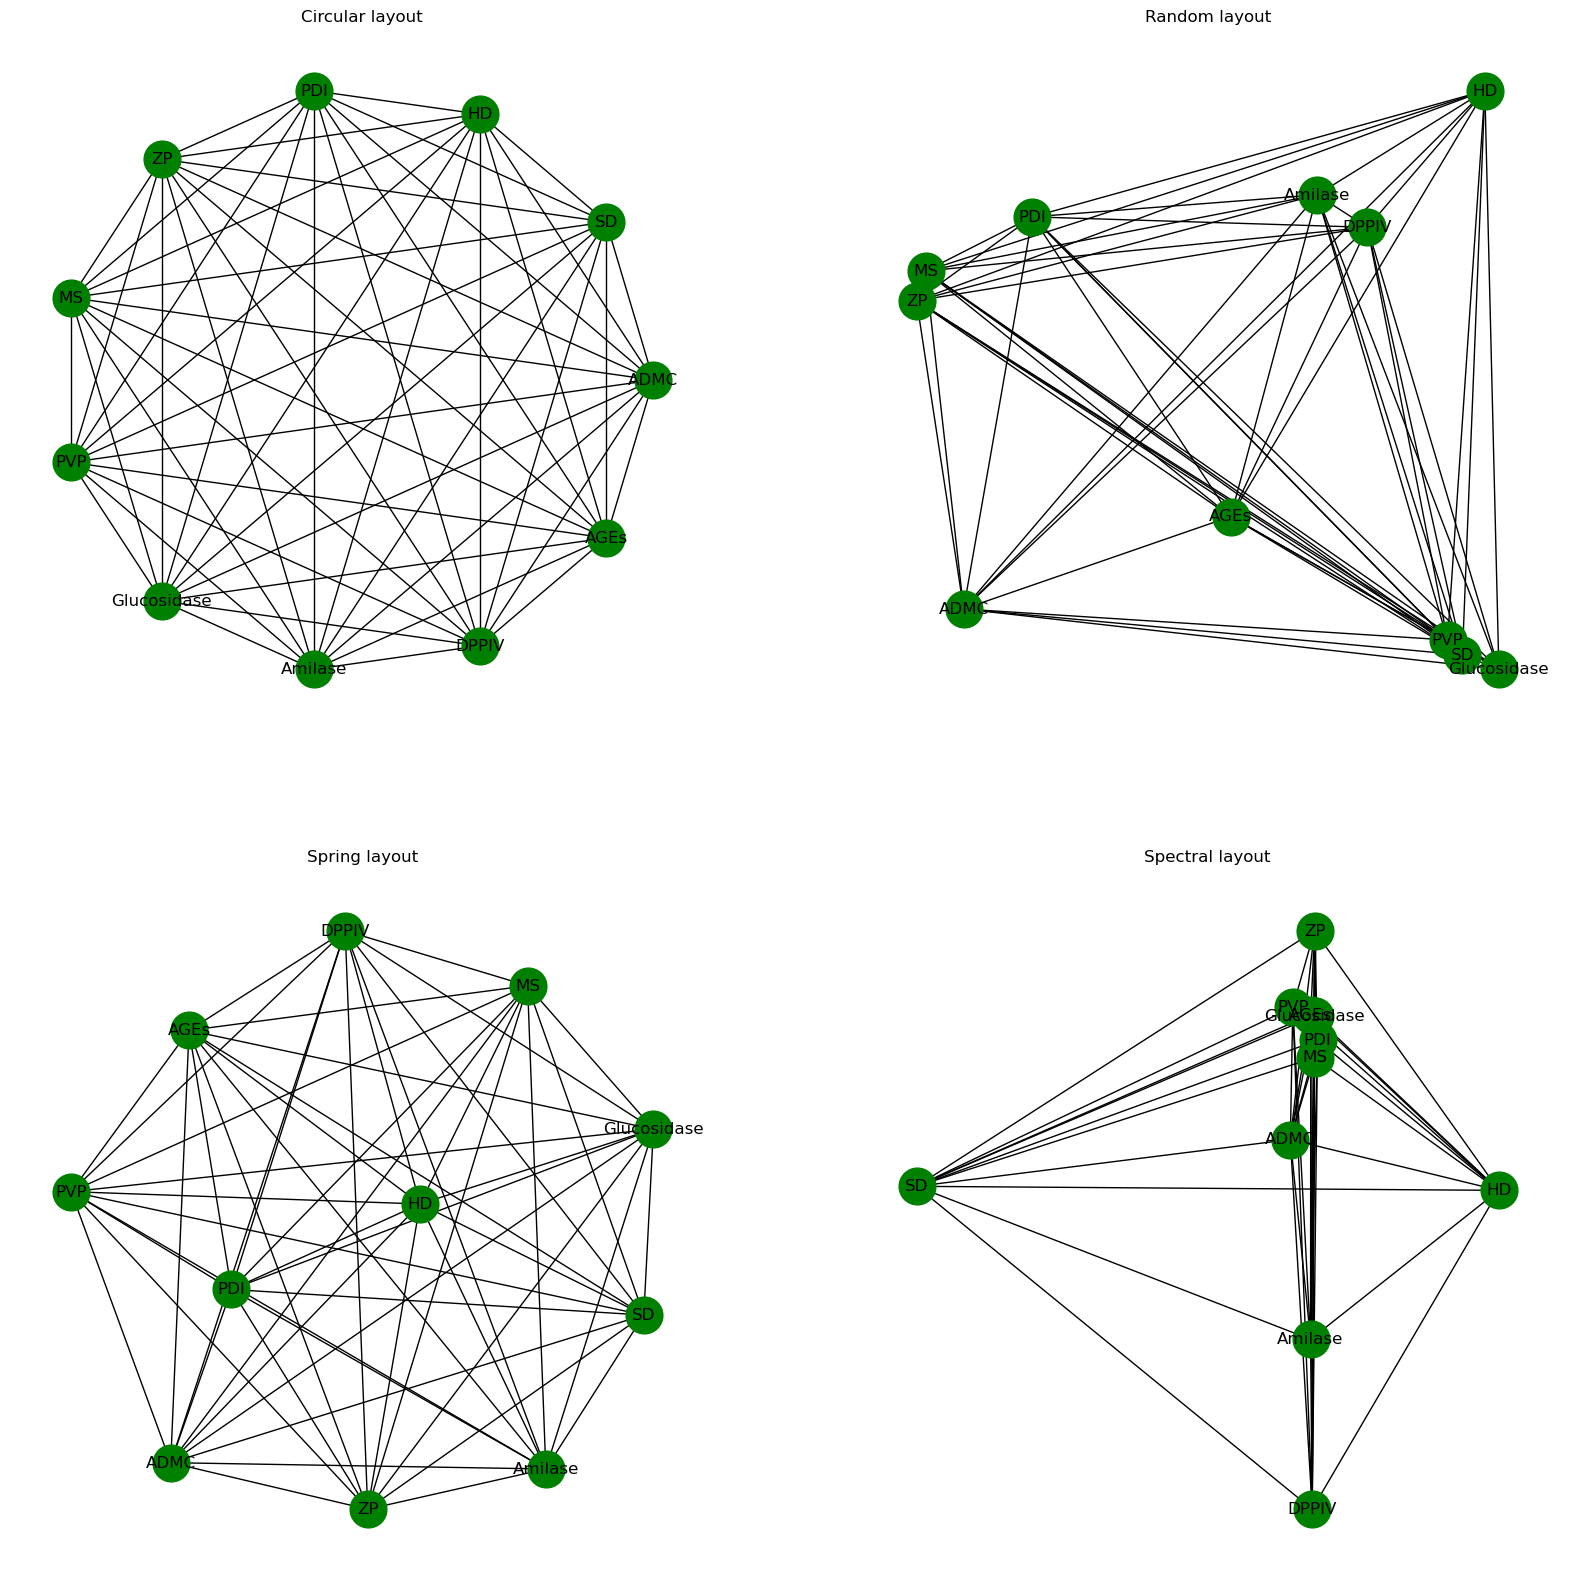

In [44]:


fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.circular_layout(G0),ax=ax[0,0])
ax[0,0].set_title("Circular layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.random_layout(G0),ax=ax[0,1])
ax[0,1].set_title("Random layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.spring_layout(G0),ax=ax[1,0])
ax[1,0].set_title("Spring layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="green",
        edge_color='black',  pos=nx.spectral_layout(G0),ax=ax[1,1])
ax[1,1].set_title("Spectral layout")

plt.show()



In [45]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#FF0000"  # red
    else:
        return "#0000FF"  # blue

def assign_thickness(correlation, benchmark_thickness=1, scaling_factor=10):
    return benchmark_thickness * abs(correlation)*scaling_factor

def assign_node_size(degree, scaling_factor=100):
    return degree * scaling_factor


In [46]:
df1.columns

Index(['ADMC', 'SD', 'HD', 'PDI', 'ZP', 'MS', 'PVP', 'Glucosidase', 'Amilase',
       'DPPIV', 'AGEs'],
      dtype='object')

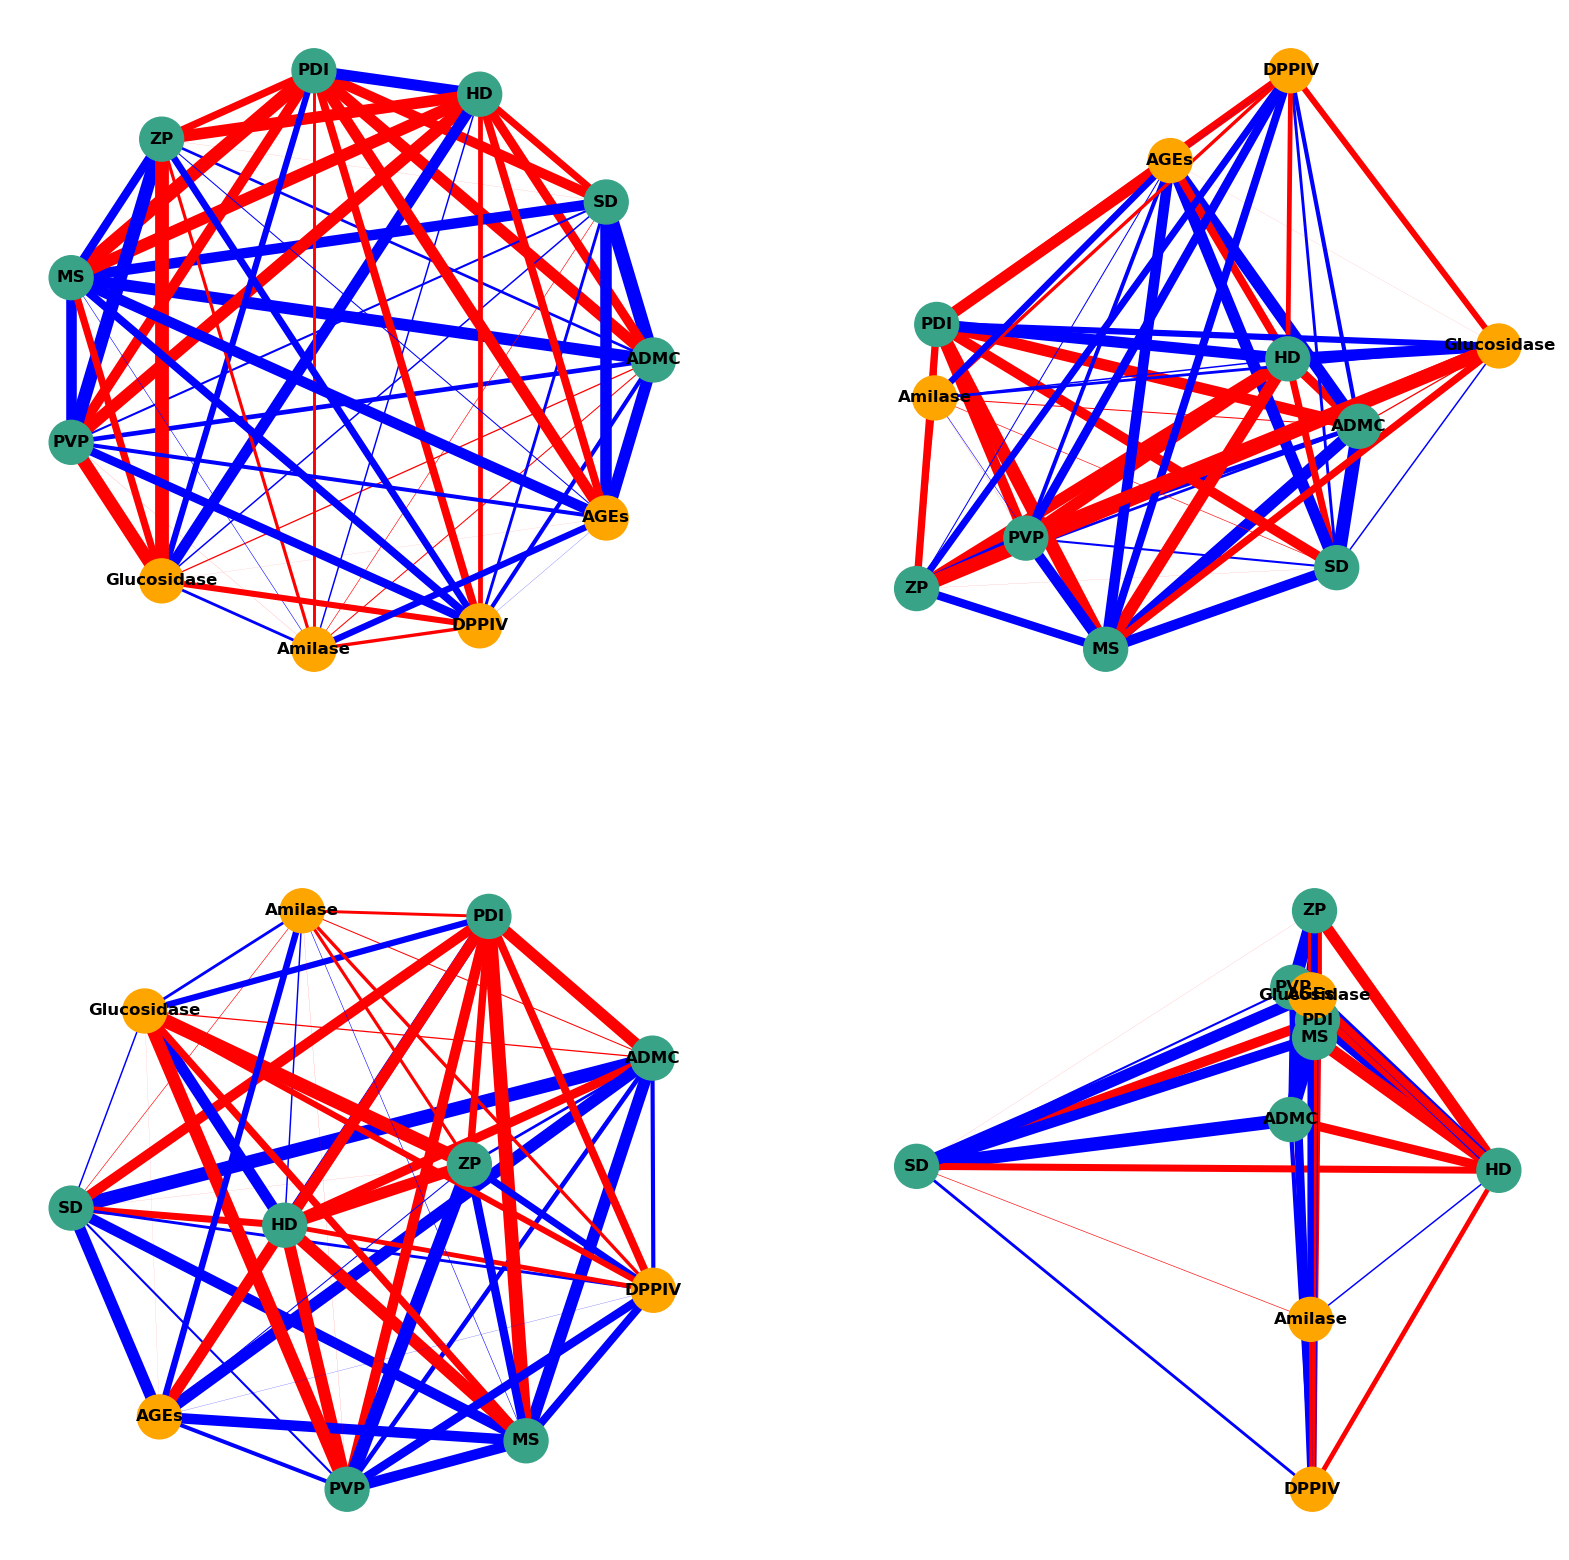

In [47]:
edge_colors_0 = []
edge_width_0 = []
for key, value in nx.get_edge_attributes(G0, 'correlation').items():
    edge_colors_0.append(assign_colour(value))
    edge_width_0.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size_0 = []
for key, value in dict(G0.degree).items():
    node_size_0.append(assign_node_size(value))
    
color_map_0 = []
for node in G0:
    if node in {'Glucosidase', 'Amilase', 'DPPIV', 'AGEs'}:
        color_map_0.append('orange')
    else: 
        color_map_0.append('#39A388') 
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.circular_layout(G0), font_weight = 'bold', ax=ax[0,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.random_layout(G0), font_weight = 'bold', ax=ax[0,1])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spring_layout(G0), font_weight = 'bold', ax=ax[1,0])
nx.draw(G0, with_labels=True, node_size=node_size_0, node_color=color_map_0, width=edge_width_0,
        edge_color=edge_colors_0,  pos=nx.spectral_layout(G0), font_weight = 'bold', ax=ax[1,1])
plt.show()



In [48]:
df1

,ADMC,SD,HD,PDI,ZP,MS,PVP,Glucosidase,Amilase,DPPIV,AGEs
Nanoparticles,,,,,,,,,,,
AgNP1,53.594771,50.0,92.860099,100.000000,16.998051,86.363636,80.114332,94.607932,55.155598,20.953101,15.887850
AgNP2,83.006536,75.0,18.708609,33.210332,88.888889,100.000000,100.000000,53.622771,60.003067,100.000000,50.505051
AgNP3,62.091503,50.0,9.064570,53.259533,100.000000,95.454545,99.755002,40.422629,83.182417,32.976190,54.487179
AgNP4,53.594771,50.0,100.000000,68.265683,9.044834,90.151515,85.422621,100.000000,100.000000,45.187602,48.022599
AgNP5,100.000000,100.0,25.062086,34.440344,28.000000,99.242424,88.485096,92.859178,82.911017,30.533510,100.000000


In [49]:
threshold = 0.5

Gx = nx.from_pandas_edgelist(edges, 'Features_1', 'Features_2', edge_attr=['correlation'])

remove = []
for Features_1, Features_2 in Gx.edges():
    corr = Gx[Features_1][Features_2]['correlation']
    if abs(corr) < threshold:
        remove.append((Features_1, Features_2))

Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))
    
color_map = []
for node in Gx:
    if node in {'Glucosidase', 'Amilase', 'DPPIV', 'AGEs'}:
        color_map.append('orange')
    else: 
        color_map.append('#39A388') 



26 edges removed


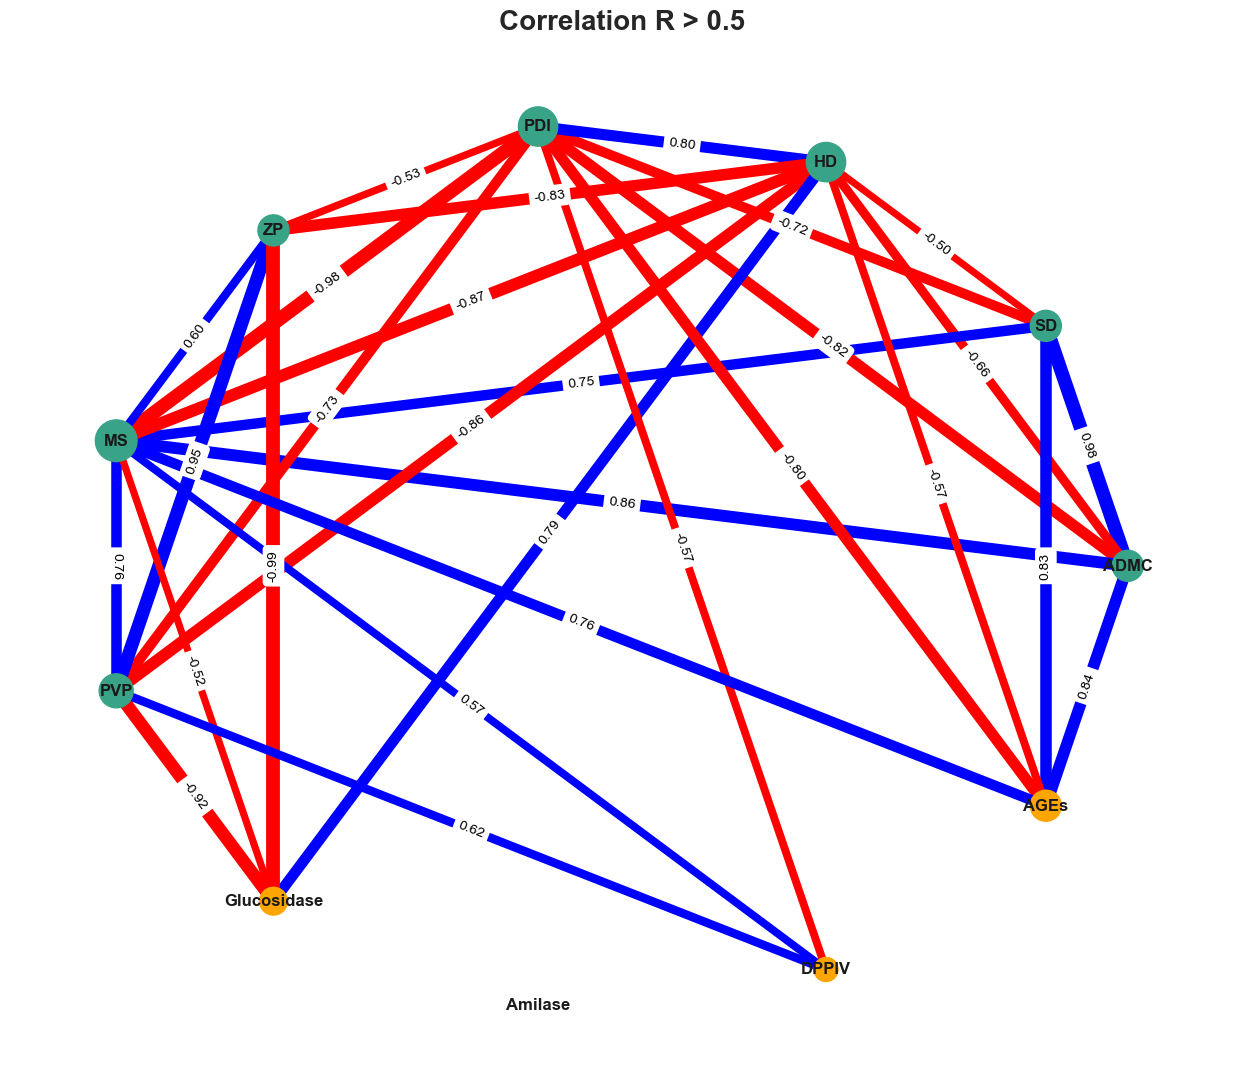

In [50]:
sns.set(rc={'figure.figsize': (7, 7)})

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color=color_map, edge_color=edge_colours, width=edge_width,
        font_size=12, font_weight = 'bold')


edge_labels = dict([((n1, n2), f"{d['correlation']:.2f}")
                    for n1, n2, d in Gx.edges(data=True)])


nx.draw_networkx_edge_labels(Gx, pos=nx.circular_layout(Gx), edge_labels=edge_labels,
                             font_color='black', font_size=10)

ax = plt.gca()
fig = plt.gcf()

k=1.7
fw = 6*k
fh = 5*k
ff = fw/fh

fh = 6*k
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.title("Correlation R > 0.5", fontsize='20', weight = 'bold')


PATH_SAVE = 'correlacion_redes_criterio_R_05.pdf'
fig.savefig(PATH_SAVE, format="pdf", bbox_inches='tight')        



#### The final figure in the manuscript was manually edited to remove specific connections between the features.